<a href="https://colab.research.google.com/github/ghulam2545/deep_learning/blob/main/mnist_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [18]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [19]:
x_train_processed = x_train.reshape(-1, 28*28).astype('float32') / 255.0
x_test_processed = x_test.reshape(-1, 28*28).astype('float32') / 255.0

In [20]:
print(x_train_processed.shape)
print(x_train_processed.shape)

(60000, 784)
(60000, 784)


In [21]:
model = keras.Sequential([
    keras.Input(shape=(28*28)),
    keras.layers.Dense(512, activation='relu', name='first_layer'),
    keras.layers.Dense(256, activation='relu', name='second_layer'),
    keras.layers.Dense(10, name='third_layer'),
])

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer (Dense)         (None, 512)               401920    
                                                                 
 second_layer (Dense)        (None, 256)               131328    
                                                                 
 third_layer (Dense)         (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [24]:
model.fit(x_train_processed, y_train, batch_size=32, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 23s 11ms/step - loss: 0.1853 - accuracy: 0.9433
Epoch 2/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0799 - accuracy: 0.9747
Epoch 3/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0531 - accuracy: 0.9834
Epoch 4/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0410 - accuracy: 0.9863
Epoch 5/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0336 - accuracy: 0.9890


In [25]:
model.evaluate(x_test_processed, y_test, batch_size=32)

313/313 [==============================] - 1s 4ms/step - loss: 0.0769 - accuracy: 0.9781


[0.07691015303134918, 0.9781000018119812]

In [27]:
sample_images = x_test[:10]
sample_labels = y_test[:10]

print(sample_images.shape)
print(sample_labels.shape)

(10, 28, 28)
(10,)


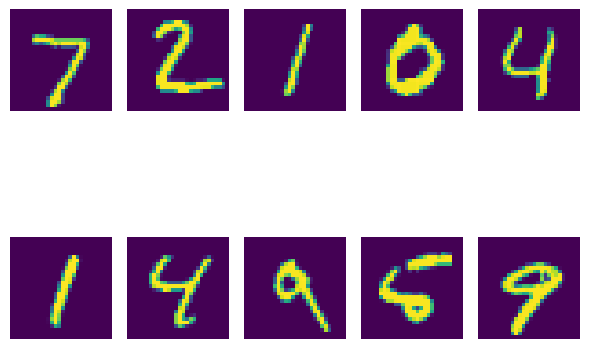

In [30]:
rows = 2
cols = 5
curr_fig = 1

plt.figure(figsize=(6,6))
for i in range(rows):
  for j in range(cols):
    plt.subplot(rows, cols, curr_fig)
    plt.imshow(sample_images[curr_fig - 1])
    plt.axis('off')
    curr_fig += 1
plt.tight_layout()
plt.show()    

In [32]:
sample_images_processed = sample_images.reshape(-1, 28*28).astype('float32') / 255.0
pred = model.predict(sample_images_processed)

for _ in pred:
  print(np.argmax(_))

1/1 [==============================] - 0s 66ms/step
7
2
1
0
4
1
4
9
5
9
